In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargar el dataset
file_path = r"C:\Users\Omar\Downloads\Projecte_ML\dataset.csv" 
df = pd.read_csv(file_path)

In [9]:
df_cat_order = df[['year', 'stud_h', 'health']]
df_cat_norder = df[['glang','sex']]
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]
df_bin = df[['part', 'job', 'psyt']]
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_cat_order_c = df_cat_order.copy()
df_cat_norder_c = df_cat_norder.copy()
df_num_c = df_num.copy()
df_bin_c = df_bin.copy()

df_cat_norder_encoded = pd.get_dummies(df_cat_norder_c, columns=['glang', 'sex'], prefix=['glang', 'sex'])

scaler = StandardScaler()
scaler2 = MinMaxScaler()

df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num_c), columns=df_num_c.columns)
df_cat_order_scaled = pd.DataFrame(scaler2.fit_transform(df_cat_order_c), columns=df_cat_order_c.columns)


df_final = pd.concat([df_cat_order_scaled, df_cat_norder_encoded, df_num_scaled, df_bin_c], axis=1)


pd.set_option('display.max_columns', None)


bool_columns = df_final.select_dtypes(include='bool').columns

for col in bool_columns:
    df_final[col] = df_final[col].astype(int)

df_final.head()

,year,stud_h,health,glang_1,glang_15,glang_20,glang_37,glang_54,glang_60,glang_63,glang_90,glang_92,glang_95,glang_98,glang_102,glang_104,glang_106,glang_108,glang_114,glang_118,glang_120,glang_121,sex_1,sex_2,sex_3,age,jspe,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,part,job,psyt
0,0.0,0.800000,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-1.328891,-2.093018,0.529045,-1.448527,0.191956,1.390242,1.512031,0.023205,0.636380,-0.908577,1,0,0
1,0.6,0.285714,0.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.096233,0.299039,-0.536951,0.412275,-0.317245,-0.963263,-0.826818,-0.547891,0.200651,0.387023,1,0,0
2,0.4,0.514286,0.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.419470,-0.042683,0.833615,0.784435,-0.317245,0.605741,2.514396,1.355762,-0.670805,-0.260777,0,0,0
3,0.2,0.728571,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.419470,-0.612221,-0.993806,-0.332046,1.210356,-0.091594,0.426137,-0.167160,-0.017213,-0.692644,0,1,0
4,0.4,0.314286,0.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.419470,-0.498313,-0.080096,-1.262447,-0.317245,-0.353095,0.259076,0.975031,0.854244,-0.260777,1,0,0


In [10]:
from sklearn.cluster import KMeans

# Configuración del modelo KMeans
n_clusters = 5  # Número de clusters (ajústalo según lo que necesites)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Entrenamiento del modelo KMeans
clusters = kmeans.fit_predict(df_final)

# Añadir las etiquetas de cluster al DataFrame original
df_final['Cluster'] = clusters

# Visualizar los clusters asignados
print("Distribución de Clusters:")
print(df_final['Cluster'].value_counts())

# Mostrar las primeras filas con las etiquetas de cluster
df_final.head()



Distribución de Clusters:
Cluster
0    211
3    186
2    178
4    157
1    154
Name: count, dtype: int64


,year,stud_h,health,glang_1,glang_15,glang_20,glang_37,glang_54,glang_60,glang_63,glang_90,glang_92,glang_95,glang_98,glang_102,glang_104,glang_106,glang_108,glang_114,glang_118,glang_120,glang_121,sex_1,sex_2,sex_3,age,jspe,qcae_cog,qcae_aff,erec_mean,cesd,stai_t,mbi_ex,mbi_cy,mbi_ea,part,job,psyt,Cluster
0,0.0,0.800000,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-1.328891,-2.093018,0.529045,-1.448527,0.191956,1.390242,1.512031,0.023205,0.636380,-0.908577,1,0,0,1
1,0.6,0.285714,0.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.096233,0.299039,-0.536951,0.412275,-0.317245,-0.963263,-0.826818,-0.547891,0.200651,0.387023,1,0,0,2
2,0.4,0.514286,0.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.419470,-0.042683,0.833615,0.784435,-0.317245,0.605741,2.514396,1.355762,-0.670805,-0.260777,0,0,0,3
3,0.2,0.728571,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.419470,-0.612221,-0.993806,-0.332046,1.210356,-0.091594,0.426137,-0.167160,-0.017213,-0.692644,0,1,0,0
4,0.4,0.314286,0.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.419470,-0.498313,-0.080096,-1.262447,-0.317245,-0.353095,0.259076,0.975031,0.854244,-0.260777,1,0,0,1


Visualització dels clusterings segons els mètodes de dimensionalitat

c:\Users\Omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Visualización sin reducción:


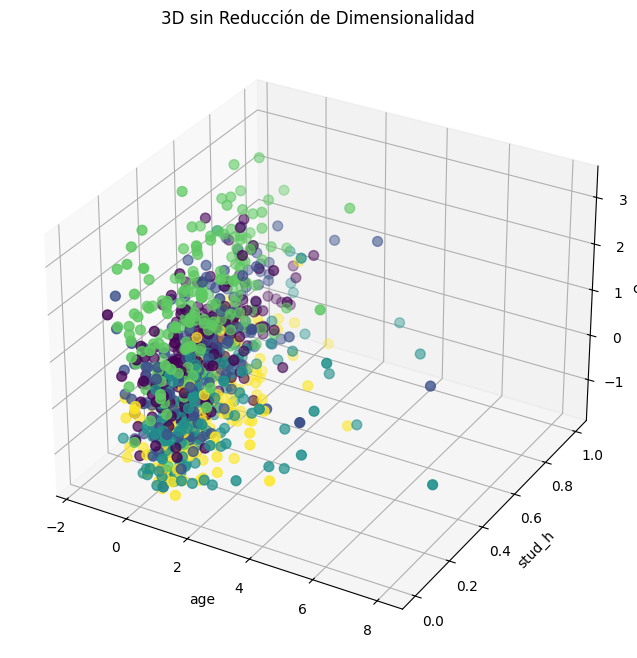

Visualización con PCA:


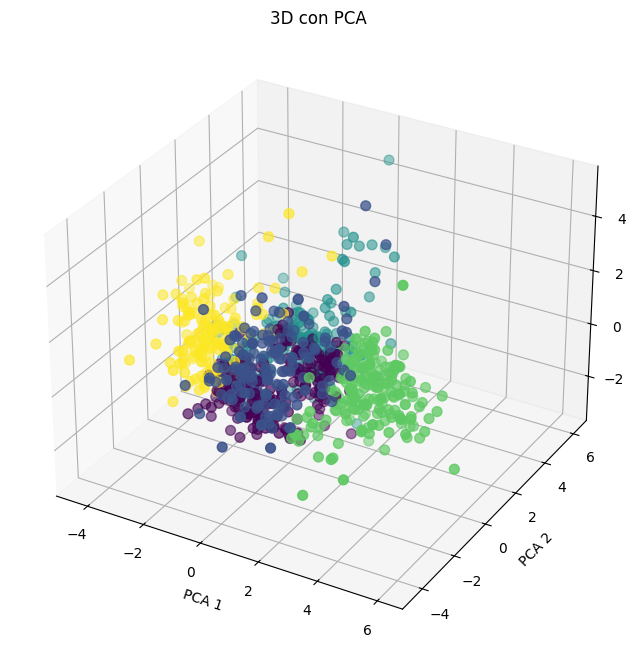

Visualización con t-SNE:


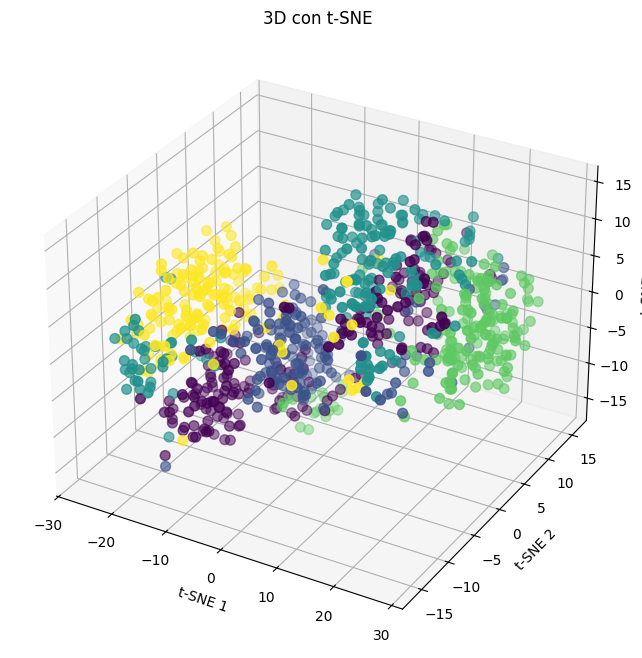

Visualización con UMAP:


c:\Users\Omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


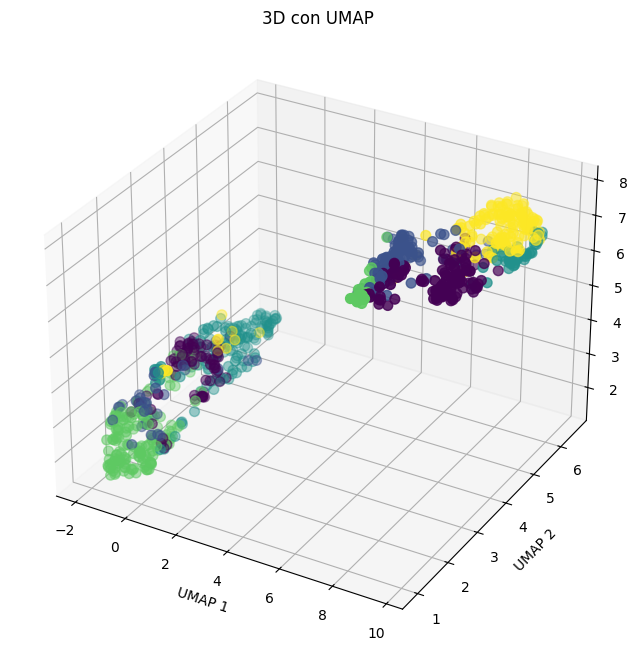

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans

# 1. Preparación de los datos (ya tienes df_final)
X = df_final.drop(columns=['Cluster'])  # Eliminamos la columna de clusters para aplicar las reducciones
y = df_final['Cluster']  # Etiquetas de los clusters

# 2. Visualización sin reducción (usamos 3 variables originales)
def plot_3d_no_reduction(X, y):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X['age'], X['stud_h'], X['cesd'], c=y, cmap='viridis', s=50)
    ax.set_title("3D sin Reducción de Dimensionalidad")
    ax.set_xlabel("age")
    ax.set_ylabel("stud_h")
    ax.set_zlabel("cesd")
    plt.show()

# 3. Visualización con PCA
def plot_3d_pca(X, y):
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', s=50)
    ax.set_title("3D con PCA")
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    ax.set_zlabel("PCA 3")
    plt.show()

# 4. Visualización con t-SNE
def plot_3d_tsne(X, y):
    tsne = TSNE(n_components=3, random_state=42)
    X_tsne = tsne.fit_transform(X)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='viridis', s=50)
    ax.set_title("3D con t-SNE")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    ax.set_zlabel("t-SNE 3")
    plt.show()

# 5. Visualización con UMAP
def plot_3d_umap(X, y):
    reducer = umap.UMAP(n_components=3, random_state=42)
    X_umap = reducer.fit_transform(X)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=y, cmap='viridis', s=50)
    ax.set_title("3D con UMAP")
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    ax.set_zlabel("UMAP 3")
    plt.show()

# Llamar a las funciones
print("Visualización sin reducción:")
plot_3d_no_reduction(X, y)

print("Visualización con PCA:")
plot_3d_pca(X, y)

print("Visualización con t-SNE:")
plot_3d_tsne(X, y)

print("Visualización con UMAP:")
plot_3d_umap(X, y)



Visualització dels clusterings segons els mètodes de dimensionalitat amb combinacions de variables (psicologiques, academiques i categoriques codificades)

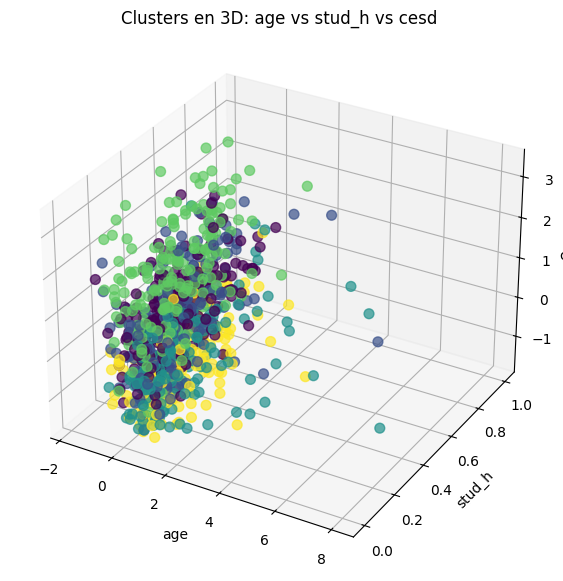

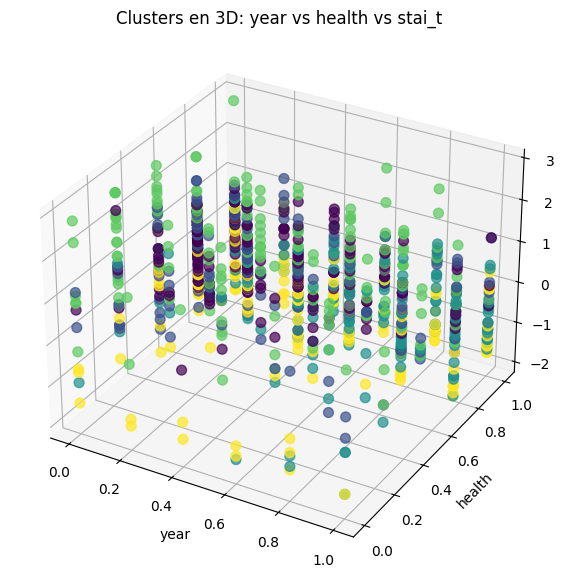

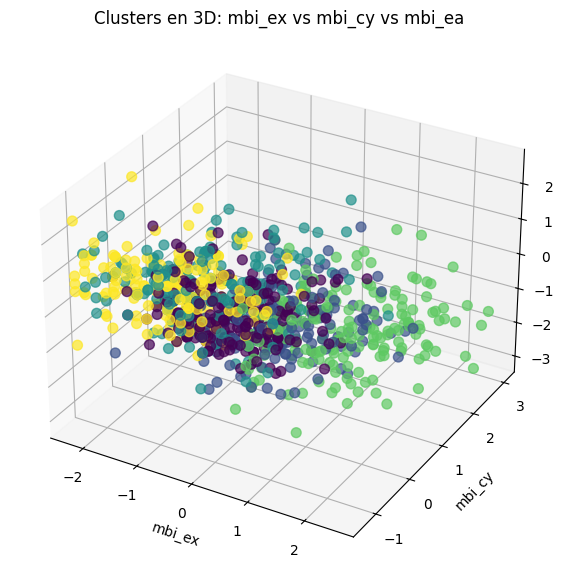

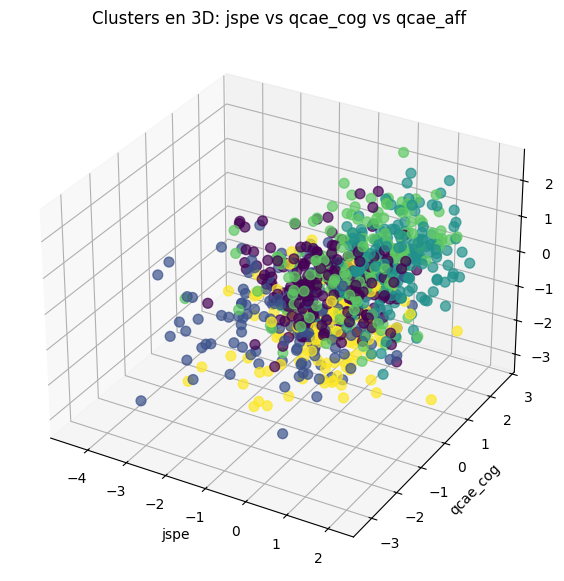

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Lista de combinaciones de variables a visualizar
variable_groups = [
    ['age', 'stud_h','cesd'],       # Demográficas + psicológicas
    ['year', 'health', 'stai_t'],    # Académicas + psicológicas
    ['mbi_ex', 'mbi_cy', 'mbi_ea'],  # Burnout-related
    ['jspe', 'qcae_cog', 'qcae_aff'] # Empatía y afecto
]

# Función para crear gráficos 3D con diferentes combinaciones
def plot_3d_variable_groups(X, clusters, variable_groups):
    for group in variable_groups:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        
        # Crear gráfico de dispersión
        ax.scatter(X[group[0]], X[group[1]], X[group[2]], 
                   c=clusters, cmap='viridis', s=50, alpha=0.7)
        
        # Etiquetas
        ax.set_xlabel(group[0])
        ax.set_ylabel(group[1])
        ax.set_zlabel(group[2])
        plt.title(f"Clusters en 3D: {group[0]} vs {group[1]} vs {group[2]}")
        plt.show()

# Llamar a la función
plot_3d_variable_groups(df_final, df_final['Cluster'], variable_groups)


c:\Users\Omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


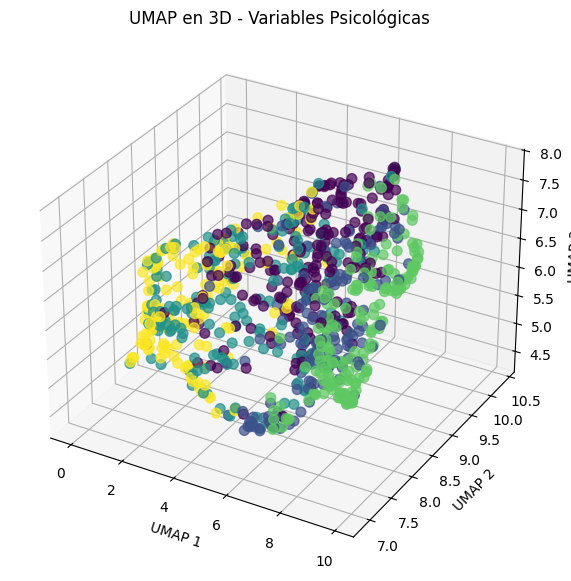

In [18]:
import umap

# Seleccionar las variables psicológicas
psychological_features = ['cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']

# Reducir con UMAP a 3 dimensiones
reducer = umap.UMAP(n_components=3, random_state=42)
X_umap_psych = reducer.fit_transform(df_final[psychological_features])

# Visualizar en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap_psych[:, 0], X_umap_psych[:, 1], X_umap_psych[:, 2], 
           c=df_final['Cluster'], cmap='viridis', s=50, alpha=0.7)

ax.set_title("UMAP en 3D - Variables Psicológicas")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
plt.show()


Distribución de Clusters (GMM):
GMM_Cluster
2    704
4     42
6     38
1     35
0     28
3     20
5     19
Name: count, dtype: int64
Silhouette Score (GMM): -0.036
Davies-Bouldin Score (GMM): 2.922
Calinski-Harabasz Index (GMM): 20.556


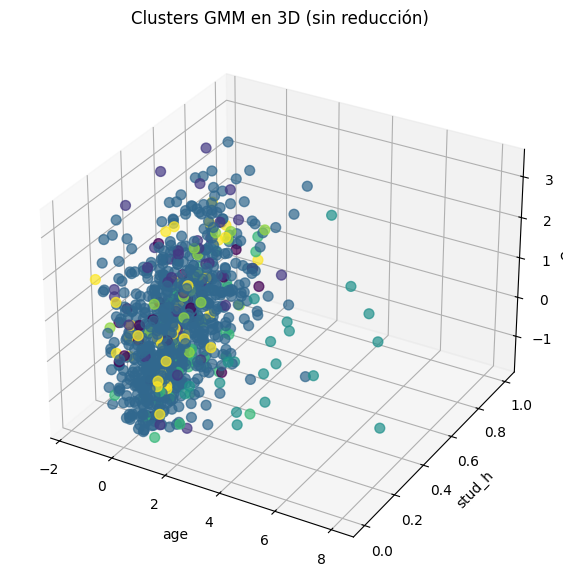

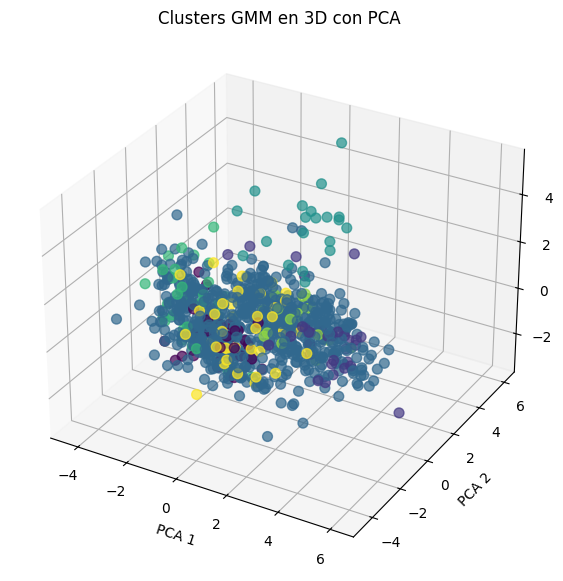

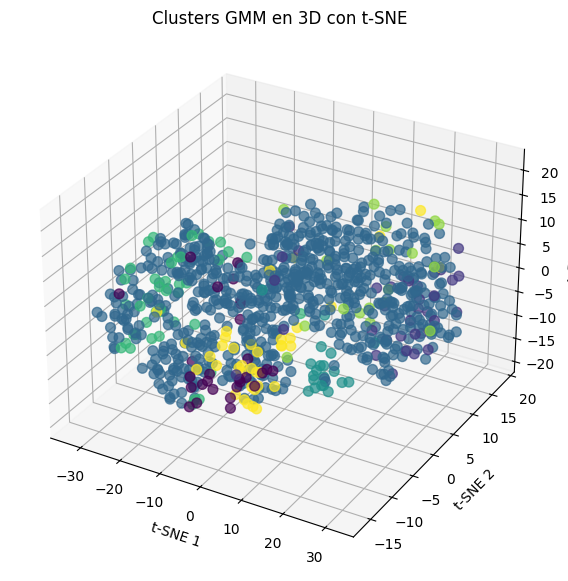

c:\Users\Omar\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


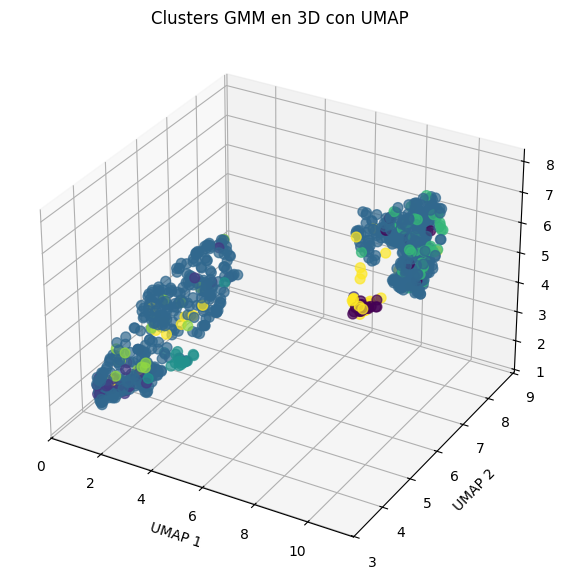

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# 1. Preparar los datos
X = df_final.drop(columns=['Cluster'])  # Datos sin la columna de cluster original

# 2. Aplicar Gaussian Mixture Models
n_clusters = 7 # Número de clusters a identificar
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Añadir las etiquetas de GMM al DataFrame
df_final['GMM_Cluster'] = gmm_labels

# Mostrar distribución de clusters
print("Distribución de Clusters (GMM):")
print(df_final['GMM_Cluster'].value_counts())

# 3. Evaluar el clustering
silhouette = silhouette_score(X, gmm_labels)
davies_bouldin = davies_bouldin_score(X, gmm_labels)
calinski_harabasz = calinski_harabasz_score(X, gmm_labels)

print(f"Silhouette Score (GMM): {silhouette:.3f}")
print(f"Davies-Bouldin Score (GMM): {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Index (GMM): {calinski_harabasz:.3f}")

# 4. Visualizar los resultados en 3D con diferentes enfoques

# Función para visualizar en 3D
def plot_3d(data, labels, title, ax_labels):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=50, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel(ax_labels[0])
    ax.set_ylabel(ax_labels[1])
    ax.set_zlabel(ax_labels[2])
    plt.show()

# 4.1 Visualización sin reducción de dimensionalidad (usamos 3 variables originales)
plot_3d(X[['age', 'stud_h', 'cesd']].values, gmm_labels, 
        "Clusters GMM en 3D (sin reducción)", ["age", "stud_h", "cesd"])

# 4.2 Visualización con PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
plot_3d(X_pca, gmm_labels, "Clusters GMM en 3D con PCA", ["PCA 1", "PCA 2", "PCA 3"])

# 4.3 Visualización con t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)
plot_3d(X_tsne, gmm_labels, "Clusters GMM en 3D con t-SNE", ["t-SNE 1", "t-SNE 2", "t-SNE 3"])

# 4.4 Visualización con UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
X_umap = reducer.fit_transform(X)
plot_3d(X_umap, gmm_labels, "Clusters GMM en 3D con UMAP", ["UMAP 1", "UMAP 2", "UMAP 3"])


Promedio de variables psicológicas por cluster:
             cesd    stai_t    mbi_ex    mbi_cy    mbi_ea
Cluster                                                  
0        0.024491  0.145063 -0.042656 -0.437453  0.238632
1        0.161982  0.202124  0.332239  0.460957 -0.654785
2       -0.617533 -0.513814 -0.559655 -0.281587  0.566563
3        1.198569  1.064740  1.084542  0.979574 -0.913221
4       -0.911629 -1.072089 -0.918922 -0.705497  0.761124


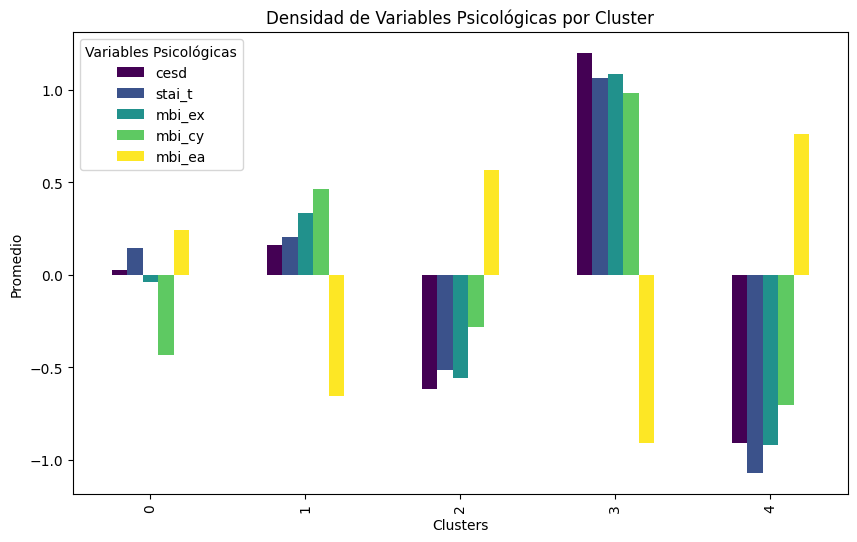

In [12]:
# Seleccionar las variables psicológicas
psych_features = ['cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']

# Calcular los promedios de las variables psicológicas por cluster
psych_means = df_final.groupby('Cluster')[psych_features].mean()

# Mostrar los resultados
print("Promedio de variables psicológicas por cluster:")
print(psych_means)

# Visualizar los promedios de las variables psicológicas
psych_means.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Densidad de Variables Psicológicas por Cluster")
plt.xlabel("Clusters")
plt.ylabel("Promedio")
plt.legend(title="Variables Psicológicas")
plt.show()


In [13]:
from sklearn.cluster import AgglomerativeClustering

# Configuración del modelo Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Entrenamiento del modelo
agg_clusters = agg_clustering.fit_predict(df_final.drop(columns=['Cluster']))  # Evitamos usar la columna Cluster

# Añadir los resultados al DataFrame
df_final['Agg_Cluster'] = agg_clusters

# Comparar las etiquetas de KMeans y Agglomerative Clustering
print("Comparación entre KMeans y Agglomerative Clustering:")
print(df_final[['Cluster', 'Agg_Cluster']].head(10))


Comparación entre KMeans y Agglomerative Clustering:
   Cluster  Agg_Cluster
0        1            1
1        2            2
2        3            2
3        0            1
4        1            1
5        1            3
6        3            3
7        2            2
8        3            3
9        0            2


In [14]:
print("Distribución final de clusters (KMeans):")
print(df_final['Cluster'].value_counts())

print("\nPromedio de variables psicológicas por cluster:")
print(psych_means)


Distribución final de clusters (KMeans):
Cluster
0    211
3    186
2    178
4    157
1    154
Name: count, dtype: int64

Promedio de variables psicológicas por cluster:
             cesd    stai_t    mbi_ex    mbi_cy    mbi_ea
Cluster                                                  
0        0.024491  0.145063 -0.042656 -0.437453  0.238632
1        0.161982  0.202124  0.332239  0.460957 -0.654785
2       -0.617533 -0.513814 -0.559655 -0.281587  0.566563
3        1.198569  1.064740  1.084542  0.979574 -0.913221
4       -0.911629 -1.072089 -0.918922 -0.705497  0.761124
